In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import *
from numpy import deg2rad
from ipywidgets import interactive,FloatSlider
#from IPython.html.widgets import FloatSlider
import matplotlib.pyplot as plt
np.random.seed(9)
import time

In [2]:
def H(q,al,a,d):
    a = np.array([[cos(deg2rad(q)), -sin(deg2rad(q))*cos(al), sin(deg2rad(q))*sin(al), a*cos(deg2rad(q))],[sin(deg2rad(q)), cos(deg2rad(q))*cos(al), -cos(deg2rad(q))*sin(al), a*sin(deg2rad(q))],[0,sin(al),cos(al),d],[0,0,0,1]]);
    return a

FORWARD KINEMATICS

In [3]:
def FK(a):
    q1 = a[0];q2=a[1];q3=a[2];q4=a[3];q5=a[4];q6=a[5];

    b1 = 0.237 ; a1 = 0 ; al1 = deg2rad(90);
    b2 = .0   ; a2 = 0 ; al2 = deg2rad(-90) ;
    b3 = .049   ; a3 = 0.29 ; al3 = deg2rad(90);
    b4 = .31 ; a4 = 0   ; al4 = deg2rad(90); 
    b5 = .0   ; a5 = 0   ; al5 = deg2rad(-90);
    b6 = .0 ; a6 = 0   ; al6 = deg2rad(90) ;

    T = np.matmul(H(q1,al1,a1,b1) , np.matmul(H(q2,al2,a2,b2) , np.matmul(H(q3,al3,a3,b3) , np.matmul(H(q4,al4,a4,b4) , np.matmul(H(q5,al5,a5,b5) , H(q6,al6,a6,b6))))));
    t1 = H(q1,al1,a1,b1)
    t2 = np.matmul(t1,H(q2,al2,a2,b2))
    t3 = np.matmul(t2,H(q3,al3,a3,b3))
    t4 = np.matmul(t3,H(q4,al4,a4,b4))
    t5 = np.matmul(t4,H(q5,al5,a5,b5))
    t6 = np.matmul(t5,H(q6,al6,a6,b6))
    return T,t1,t2,t3,t4,t5,t6

In [4]:
a,t1,t2,t3,t4,t5,t6 = FK([0,90,0,0,270,-180])

In [5]:
print(a)

[[ 6.1232340e-17  1.8369702e-16 -1.0000000e+00 -4.9000000e-02]
 [-1.0000000e+00  2.4492936e-16 -6.1232340e-17 -3.1000000e-01]
 [ 2.4492936e-16  1.0000000e+00  1.8369702e-16  5.2700000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [6]:
o_x=[]
o_y=[]
o_z=[]
o_x1=[]
o_y1=[]
o_z1=[]

In [7]:
def draw(T1,T2,T3,T4,T5,T6):
    a,t1,t2,t3,t4,t5,t6 = FK([T1,T2,T3,T4,T5,T6])
    a1 = a[0:3,-1]
    x1 = np.matmul(t1,np.array([0,0,0,1]))
    x2 = np.matmul(t2,np.array([0,0,0,1]))
    x3 = np.matmul(t3,np.array([0,0,0,1]))
    x4 = np.matmul(t4,np.array([0,0,0,1]))
    x5 = np.matmul(t5,np.array([0,0,0,1]))
    x6 = np.matmul(t6,np.array([0,0,0,1]))
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    
    x = np.linspace(x1[0],x1[0],100)
    y = np.linspace(x1[1],x1[1],100)
    z = np.linspace(x1[2]-0.025,x1[2],100)
    #ax.plot(x,-y,z,linewidth=20)

    x = np.linspace(x1[0],x3[0],10)
    y = np.linspace(x1[1],x3[1],10)
    z = np.linspace(x1[2],x3[2],10)
    ax.plot(x,y,z,linewidth=5)

    
    x = np.linspace(x3[0],x4[0],10)
    y = np.linspace(x3[1],x4[1],10)
    z = np.linspace(x3[2],x4[2],10)
    ax.plot(x,y,z,linewidth=5)
    
    x = np.linspace(x4[0],x5[0],10)
    y = np.linspace(x4[1],x5[1],10)
    z = np.linspace(x4[2],x5[2],10)
    ax.plot(x,y,z,linewidth=5)
    
    x = np.linspace(x5[0],x6[0],10)
    y = np.linspace(x5[1],x6[1],10)
    z = np.linspace(x5[2],x6[2],10)
    ax.plot(x,y,z,linewidth=5)
    
    o_x.append(x6[0])
    o_y.append(x6[1])
    o_z.append(x6[2])
    ax.scatter(x1[0],x1[1],x1[2]+0.02,s=400)
   # ax.scatter(x2[0],x2[1],x2[2],s=100)
    ax.scatter(x3[0],x3[1],x3[2],s=100)
    ax.scatter(x4[0],x4[1],x4[2],s=100)
    ax.scatter(x5[0],x5[1],x5[2],s=100)
    ax.scatter(x6[0],x6[1],x6[2],s=100)
    l = '(%f, %f, %f)' % (x6[0],x6[1],x6[2])
    ax.text(x6[0],x6[1],x6[2],l)
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(0.2,1)
    ax.plot(o_x,o_y,o_z)
    np.set_printoptions(suppress=True)
    print(a)   

In [8]:
F1 = FloatSlider(value=0,   min=-155,max=155)
F2 = FloatSlider(value=90,  min=-65, max=180)
F3 = FloatSlider(value=0,   min=-68, max=105)
F4 = FloatSlider(value=0,   min=-350,max=350)
F5 = FloatSlider(value=270, min=50,  max=310)
F6 = FloatSlider(value=-180,min=-530,max=170)
interactive_plot = interactive(draw, T1=F1,T2=F2,T3=F3,T4=F4,T5=F5,T6=F6)
output = interactive_plot.children[-1]
output.layout.height = '800px'
 
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='T1', max=155.0, min=-155.0), FloatSlider(value=90.0,…

In [35]:
from scipy.optimize import minimize,fmin
from scipy.spatial.transform import Rotation as R

In [36]:
def fitness_F(x,a,b,c,d,e,f):
    i = [a,b,c,d,e,f]
    a,_,_,_,_,_,_ = FK(x)
    r = R.from_matrix(a[0:3,0:3])
    p = np.concatenate((np.array(a[0:3,3]),np.array(r.as_euler('xyz', degrees=True))))
    del_e = i - p
    y = np.linalg.norm(del_e,4) + 2
    return y

INVERSE KINEMATICS

In [37]:
def IK_F(i):
    x0 = np.random.randint(100,size=(1,6))
    res = fmin(fitness_F,x0,args=tuple(i),ftol=0.0001,maxiter=2000)
    return res

In [38]:
def draw_ik(i):
    ee=i
    a = IK_F(i)
    r=a[0]
    o=a[1]
    h=a[2]
    i=a[3]
    t=a[4]
    h1=a[5]
    np.set_printoptions(suppress=True)
    np.set_printoptions(precision=1)
    print("\n",a,"\n")
    a,t1,t2,t3,t4,t5,t6 = FK([r,o,h,i,t,h1])
    a1 = a[0:3,-1]
    x1 = np.matmul(t1,np.array([0,0,0,1]))
    x2 = np.matmul(t2,np.array([0,0,0,1]))
    x3 = np.matmul(t3,np.array([0,0,0,1]))
    x4 = np.matmul(t4,np.array([0,0,0,1]))
    x5 = np.matmul(t5,np.array([0,0,0,1]))
    x6 = np.matmul(t6,np.array([0,0,0,1]))
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    x = np.linspace(x1[0],x3[0],10)
    y = np.linspace(x1[1],x3[1],10)
    z = np.linspace(x1[2],x3[2],10)
    ax.plot(x,y,z,linewidth=5)
    
    x = np.linspace(x2[0],x3[0],10)
    y = np.linspace(x2[1],x3[1],10)
    z = np.linspace(x2[2],x3[2],10)   # ax.plot(x,y,z,linewidth=5)
    
    x = np.linspace(x3[0],x4[0],10)
    y = np.linspace(x3[1],x4[1],10)
    z = np.linspace(x3[2],x4[2],10)
    ax.plot(x,y,z,linewidth=5)
    
    x = np.linspace(x4[0],x5[0],10)
    y = np.linspace(x4[1],x5[1],10)
    z = np.linspace(x4[2],x5[2],10)
    ax.plot(x,y,z,linewidth=5)
    
    x = np.linspace(x5[0],x6[0],10)
    y = np.linspace(x5[1],x6[1],10)
    z = np.linspace(x5[2],x6[2],10)
    ax.plot(x,y,z,linewidth=5)
    
    o_x1.append(x6[0])
    o_y1.append(x6[1])
    o_z1.append(x6[2])
    
    ax.scatter(x1[0],x1[1],x1[2]+0.02,s=400)
   # ax.scatter(x2[0],x2[1],x2[2],s=100)
    ax.scatter(x3[0],x3[1],x3[2],s=100)
    ax.scatter(x4[0],x4[1],x4[2],s=100)
    ax.scatter(x5[0],x5[1],x5[2],s=100)
    ax.scatter(x6[0],x6[1],x6[2],s=100)
    l = '(%f, %f, %f)' % (x6[0],x6[1],x6[2])
    ax.text(x6[0],x6[1],x6[2],l)
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(0.2,1)
    #ax.plot(o_x1,o_y1,o_z1)
    print(a)
    print("\n","Error:",np.linalg.norm(ee[0:3]-x6[0:3]*1000,2)/1000)

In [39]:
i = [800,0, 1005, 180,0,0] #input in mm

Optimization terminated successfully.
         Current function value: 1094.940917
         Iterations: 595
         Function evaluations: 994

 [-90.   -0.  -90.  270.   90.2 359.8] 

[[ 1.  -0.  -0.   0.4]
 [-0.  -1.  -0.   0. ]
 [-0.   0.  -1.   0.5]
 [ 0.   0.   0.   1. ]]

 Error: 0.6503575939435993


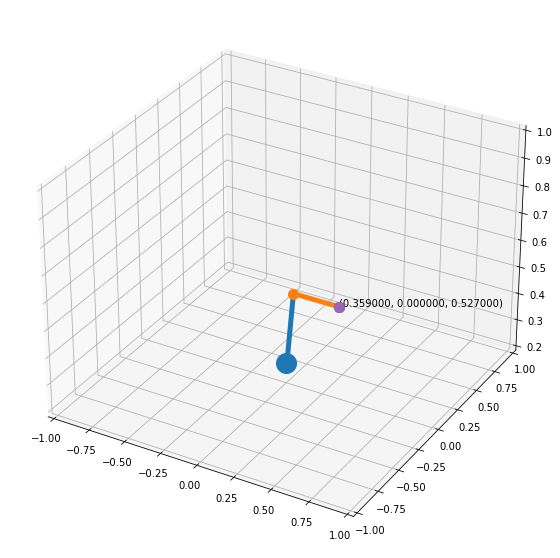

In [40]:
draw_ik(i)

In [41]:
%%time
a=IK_F(i)

Optimization terminated successfully.
         Current function value: 1094.940917
         Iterations: 1048
         Function evaluations: 1701
Wall time: 566 ms


In [42]:
%%time
_=FK(a)

Wall time: 8.18 ms
